# Q5

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns

In [34]:
df = pd.read_csv('./R PY Computing/boston_csv.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,NaN,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,na,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0


In [35]:
df.isnull().sum()
df = df.replace("na","Nan")
df["NOX"] = df["NOX"].astype(float)
df["LSTAT"] = df["LSTAT"].astype(float)
df.isnull().sum()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          1
RM           0
AGE          1
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            1
LSTAT        1
MEDV         0
CAT. MEDV    0
dtype: int64

In [36]:
df = df.dropna()
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,0
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5,0
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0


# Q6

In [18]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
count,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000
mean,3.641708,11.418327,11.163765,0.069721,0.554802,6.284805,68.514542,3.797274,9.605578,409.095618,18.456574,356.353506,12.681514,22.564343,0.167331
std,8.629979,23.396912,6.873538,0.254930,0.116263,0.705085,28.247125,2.111828,8.717100,168.859125,2.165559,91.587527,7.155966,9.217580,0.373643
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,0.000000
25%,0.082492,0.000000,5.190000,0.000000,0.449000,5.884250,44.550000,2.091150,4.000000,279.250000,17.400000,375.240000,6.950000,17.100000,0.000000
50%,0.262660,0.000000,9.690000,0.000000,0.538000,6.208500,77.150000,3.207450,5.000000,330.000000,19.050000,391.340000,11.395000,21.200000,0.000000
75%,3.689387,12.500000,18.100000,0.000000,0.624000,6.628000,94.100000,5.213925,24.000000,666.000000,20.200000,396.120000,17.057500,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,1.000000


In [20]:
df_corr = df.corr()
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,0
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5,0
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0


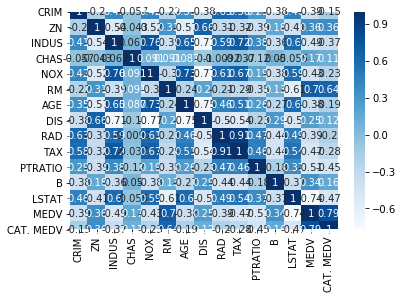

In [21]:
sns.heatmap(df_corr, annot = True, cmap='Blues')
plt.show()

# Q7

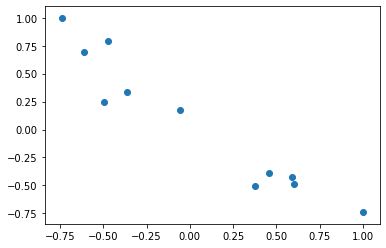

상수항:  0.08726628538940004
기울기:  [-0.96693715]
MSE:  0.026517244412022422
R^2:  0.9251977332840927
MSE:  0.00808385779350121


In [30]:
lm = LinearRegression()

x = df_corr[['LSTAT']]
y = df_corr['MEDV']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

lm.fit(x_train,y_train)
yhat = lm.predict(x_train)
plt.scatter(x_train, y_train)
plt.show()

print("상수항: ", lm.intercept_)
print("기울기: ", lm.coef_)
print("MSE: ", mean_squared_error(y_train,yhat))
print("R^2: ", lm.score(x,y))

y_pred = lm.predict(x_test)
print("MSE: ", mean_squared_error(y_test,y_pred))

# Q8

In [32]:
z = df[['LSTAT','TAX']]
y = df['MEDV']
z_train, z_test, y_train, y_test = train_test_split(z, y, test_size=0.25, random_state=0)


lm.fit(z_train,y_train)
yhat = lm.predict(z_train)

print("상수항: ", lm.intercept_)
print("기울기: ", lm.coef_)
print("MSE: ", mean_squared_error(y_train,yhat))
print("R^2: ", lm.score(z,y))

y_pred = lm.predict(z_test)
print("MSE: ", mean_squared_error(y_test,y_pred))

상수항:  36.31384685772977
기울기:  [-0.90536433 -0.00555407]
MSE:  39.65545131415304
R^2:  0.5562830924585225
MSE:  31.56493746549087
